In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler # bu kütüphaneyle normalizition yapıcaz (knn'de elle yapmıştık)

In [3]:
df=pd.read_csv("Kmeans.csv")
df.head()

,Ad,Yas,Gelir
0,Ismail,28,5900
1,Kaan,42,15100
2,Ozben,27,5750
3,Galip,39,15400
4,Batuhan,41,15900


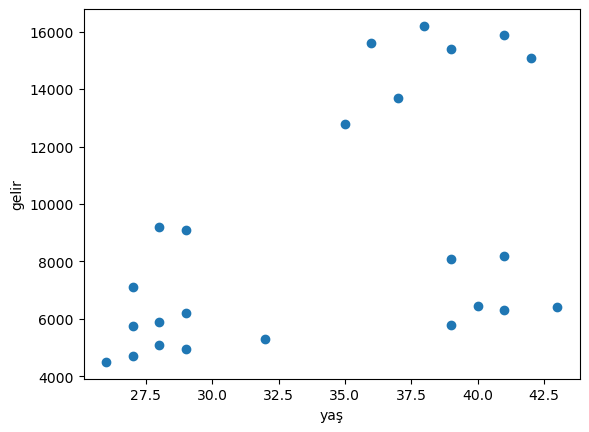

In [4]:
plt.scatter(df.Yas,df.Gelir)
plt.xlabel("yaş")
plt.ylabel("gelir")
plt.show()

#verisetimize bir göz atalım

### modelimizi normalize etmemiz lazım yani 0 ile 1 arasına çekmemiz lazım ki algoritma hesap yaparken yanılmasın

In [8]:
scaler=MinMaxScaler()

scaler.fit(df[["Gelir"]])
df["Gelir"]=scaler.transform(df[["Gelir"]]) #normalization işlemini burda yapıyor

scaler.fit(df[["Yas"]])
df["Yas"]=scaler.transform(df[["Yas"]]) #normalization işlemi yine

In [9]:
df.head()

,Ad,Yas,Gelir
0,Ismail,0.117647,0.119658
1,Kaan,0.941176,0.905983
2,Ozben,0.058824,0.106838
3,Galip,0.764706,0.931624
4,Batuhan,0.882353,0.974359


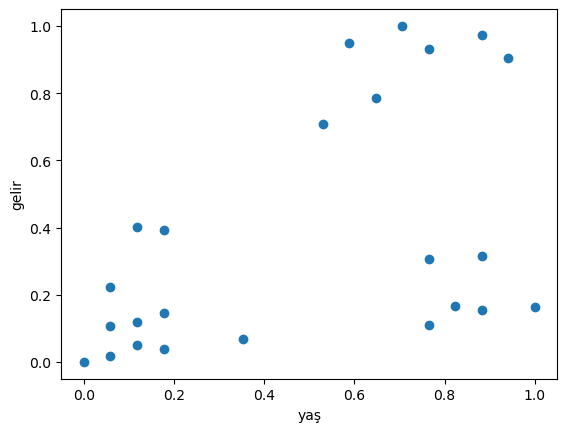

In [10]:
#verisetimize scatter çizimi yapalım
plt.scatter(df.Yas,df.Gelir)
plt.xlabel("yaş")
plt.ylabel("gelir")
plt.show()

In [16]:
# k=3 için bir k-means modeli oluşturalım
kmeans_model=KMeans(n_clusters=3)
y_predicted=kmeans_model.fit_predict(df[["Yas","Gelir"]])
y_predicted
#gruplamayı yaptırıyrouz

C:\Users\90541\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\90541\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2,
       2, 1])

In [17]:
# bu oluşan arrayi yeni bir sütun olarak bize veriyor buna yeni bir isim verelim
df["Cluster"]=y_predicted
df.head()

,Ad,Yas,Gelir,Cluster
0,Ismail,0.117647,0.119658,1
1,Kaan,0.941176,0.905983,0
2,Ozben,0.058824,0.106838,1
3,Galip,0.764706,0.931624,0
4,Batuhan,0.882353,0.974359,0


In [18]:
#centroidleri görelim
kmeans_model.cluster_centers_

array([[0.72268908, 0.89377289],
       [0.12834225, 0.14219114],
       [0.85294118, 0.20299145]])

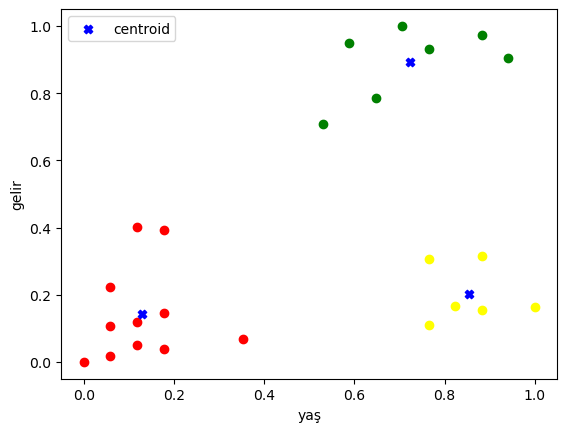

In [23]:
#böyle çok bir şey anlamadık grafikte görelim
df1=df[df.Cluster==0]
df2=df[df.Cluster==1]
df3=df[df.Cluster==2]

plt.xlabel("yaş")
plt.ylabel("gelir")

plt.scatter(df1.Yas,df1["Gelir"],color="green")
plt.scatter(df2.Yas,df2["Gelir"],color="red")
plt.scatter(df3.Yas,df3["Gelir"],color="yellow")

#kmeans_model.cluster_centers_ numpy 2 boyutlu array olduğu için x ve y sütunlarını -
#kmeans_model.cluster_centers_[:,0] ve kmeans_model.cluster_centers_[:,1] şeklinde scatter plot için alıyruz.
plt.scatter(kmeans_model.cluster_centers_[:,0],kmeans_model.cluster_centers_[:,1],color="blue",marker="X",label="centroid")
#centroidlerimizi de mavi ile tuttuk

plt.legend()
plt.show()


In [24]:
#kimlerin hangi grupta olduğunu görelim
df.sort_values("Cluster")[["Ad","Cluster"]]

,Ad,Cluster
1,Kaan,0
3,Galip,0
4,Batuhan,0
6,Ali,0
7,Bartu,0
8,Ayse,0
10,Durmus,0
0,Ismail,1
20,Melih,1
15,Rauf,1


### K değerini belirlemek - Elbow Yöntemi

In [26]:
k_range=range(1,20) #1,10 da 1,15 de diyebiliriz veri çokluğuna göre değişir 20 iyidir ama

list_dist=[]

for k in k_range:
    kmeans_model=KMeans(n_clusters=k)
    kmeans_model.fit(df[["Yas","Gelir"]])
    list_dist.append(kmeans_model.inertia_) #inertia hata değeridir

C:\Users\90541\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\90541\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\90541\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\90541\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

C:\Users\90541\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\90541\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\90541\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\90541\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

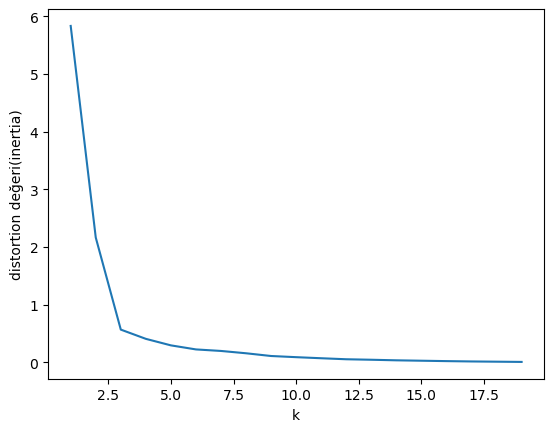

In [27]:
plt.xlabel("k")
plt.ylabel("distortion değeri(inertia)")
plt.plot(k_range,list_dist)
plt.show()

#### sonuç: 
kırılım noktası bariz şekilde 3 tür.
en iyi k değeri = 3 